<a href="https://colab.research.google.com/github/Abbhiraami/neural_network/blob/main/nn_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Configuring a Neural network from scratch

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import logging
### Removing matplotlib warnings on the tsensor explain stage
logging.getLogger('matplotlib.font_manager').disabled = True

Activation Function - The activation function of a node in an artificial neural network is a function that calculates the output of the node based on its individual inputs and their weights.

$ϕ(w_i*input + b_i)$

There are several activation functions like,

* ReLU
* Sigmoid
* Leaky ReLU
* Tanh
* Softmax








In [ ]:
x=np.linspace(0,10,1000)
### Sigmoid
def sigmoid(x):
  return (1/(1+np.exp(-x)))
def relu(x):
  return np.maximum(0,x)
def leaky_relu(x,alpha=0.1):
  return np.maximum(alpha*x,x)
def tanh(x):
  return np.tanh(x)
def softmax(x):
  return np.exp(x)/np.sum(np.exp(x))


In [ ]:
prediction= lambda x, w1=.2, b1=1.99: (w1*x+b1)

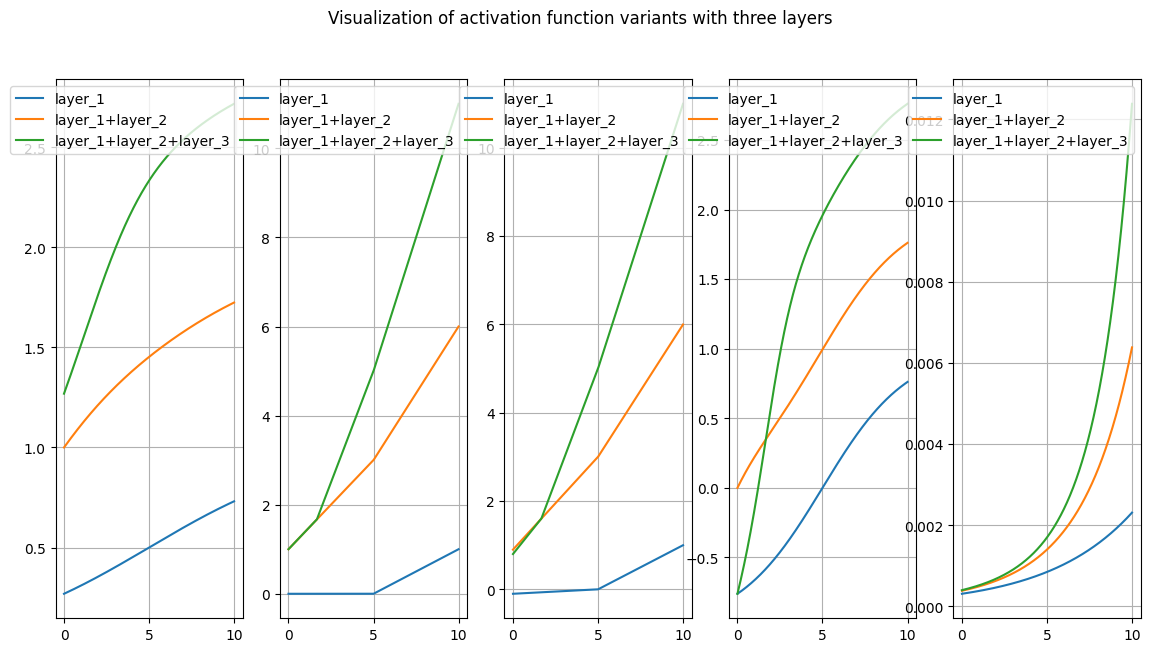

In [ ]:
fig,ax = plt.subplots(1,5,figsize=(14,7))
fig.suptitle("Visualization of activation function variants with three layers")
for typ,axs in zip([sigmoid,relu,leaky_relu,tanh,softmax],ax.ravel()):
  layer_1=typ(prediction(x,0.2,-1))
  layer_2=typ(prediction(x,0.4,1))
  layer_3=typ(prediction(x,0.6,-1))
  axs.plot(x,layer_1,label="layer_1")
  axs.plot(x,layer_1+layer_2,label="layer_1+layer_2")
  axs.plot(x,layer_1+layer_2+layer_3,label="layer_1+layer_2+layer_3")
  axs.grid()
  axs.legend()


The more layers to the neural network adds more non-linearity relationship in the activation function

In [ ]:
## tsensor requires the following packages to be installed
! pip install -q tensorflow
! pip install -q jax jaxlib
! pip install -q numpy
! pip install -q torch
! pip install -q scikit-learn
! pip install -q tensor-sensor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 73.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


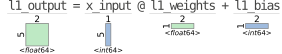

In [ ]:
import tsensor
from tsensor import explain as exp

x_input = np.array([[10], [20], [-20], [-40], [-3]])

# 1x2 weight matrix
l1_weights = np.array([[.73, .2]])

# 1x2 bias matrix
l1_bias = np.array([[4, 2]])

# output
with exp() as c:
    l1_output = x_input @ l1_weights + l1_bias

In [ ]:
l1_activated=relu(l1_output)
l1_activated, l1_output,l1_weights,l1_bias

(array([[11.3 ,  4.  ],
        [18.6 ,  6.  ],
        [ 0.  ,  0.  ],
        [ 0.  ,  0.  ],
        [ 1.81,  1.4 ]]),
 array([[ 11.3 ,   4.  ],
        [ 18.6 ,   6.  ],
        [-10.6 ,  -2.  ],
        [-25.2 ,  -6.  ],
        [  1.81,   1.4 ]]),
 array([[0.73, 0.2 ]]),
 array([[4, 2]]))

In [ ]:
def calculate_mse(actual, predicted):
    return (actual - predicted) ** 2

actual = np.array([[9], [13], [5], [-2], [-1]])

print(calculate_mse(actual,l1_output))

[[  5.29    25.    ]
 [ 31.36    49.    ]
 [243.36    49.    ]
 [538.24    16.    ]
 [  7.8961   5.76  ]]


In [ ]:
def gradient_mse(actual, predicted):
    return predicted - actual

print(gradient_mse(actual,l1_output))

[[  2.3   -5.  ]
 [  5.6   -7.  ]
 [-15.6   -7.  ]
 [-23.2   -4.  ]
 [  2.81   2.4 ]]


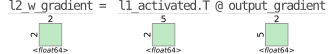

array([[ 135.2361, -182.356 ],
       [  46.734 ,  -58.64  ]])

In [ ]:
output_gradient = gradient_mse(actual, l1_output)

with exp():
    l2_w_gradient =  l1_activated.T @ output_gradient
l2_w_gradient

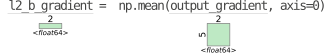

array([-5.618, -4.12 ])

In [ ]:
l2_w_gradient =  l1_activated.T @ output_gradient
with exp():
    l2_b_gradient =  np.mean(output_gradient, axis=0)

l2_b_gradient

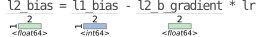

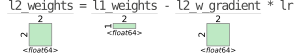

array([[0.71647639, 0.2182356 ],
       [0.7253266 , 0.205864  ]])

In [ ]:
# Set a learning rate
lr = 1e-4
l2_bias=0
with exp():
  # Update the bias values
  l2_bias = l1_bias - l2_b_gradient * lr
  # Update the weight values
  l2_weights = l1_weights - l2_w_gradient * lr

l2_weights

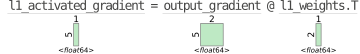

array([[  0.679 ],
       [  2.688 ],
       [-12.788 ],
       [-17.736 ],
       [  2.5313]])

In [ ]:
with exp():
    # Calculate the gradient on the output of layer 1
    l1_activated_gradient = output_gradient @ l1_weights.T

l1_activated_gradient

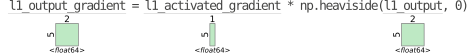

array([[ 0.679 ,  0.679 ],
       [ 2.688 ,  2.688 ],
       [-0.    , -0.    ],
       [-0.    , -0.    ],
       [ 2.5313,  2.5313]])

In [ ]:
with exp():
    l1_output_gradient = l1_activated_gradient * np.heaviside(l1_output, 0)

l1_output_gradient

In [ ]:
# back propagation
l1_w_gradient =  x_input.T @ l1_output_gradient
l1_b_gradient = np.mean(l1_output_gradient, axis=0)

# gradient descent
l1_weights -= l1_w_gradient * lr
l1_bias -= l1_b_gradient * lr

In [ ]:

l1_weights

array([[0.70352195, 0.17352195]])

In [ ]:
l1_bias -= l1_b_gradient * lr

In [ ]:
l1_bias

array([0., 0.])

In [ ]:
l1_b_gradient * lr

array([0.00011797, 0.00011797])